In this post, I will quickly solve the classification problem of grayscale images of handwritten digits using Keras. This data set, also called MNIST, is classic. It contains tenths of thousand of handwritten numbers (which are 28x28 pixels), and the classification task is to categorize them into their ten categories: 0 to 9. 

The dataset contain 60K traning images (which we will further separate to train and dev sets) plus 10K test images. The data were gathered by the [National Institute of Standards and Technology](https://www.nist.gov/) about 30-40 years ago. To the deep-learning community solving the MNIST problem is like printing “Hello World” as is custom for any computer-science major.

The MNIST dataset comes pre-loaded in Keras as a set of Numpy arrays. 

In [1]:
import keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

/Users/nc374/anaconda/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


train_images and train_labels come form the "training set," the data that our model will learn from. Later on, we will split the train set into train and dev sets. Our model will be tested against the "test set," containing test_images and test_labels. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging from 0 to 9. There is, of course, direct correspondence between the images and the labels.

Let us look on a few of the images and their labels.

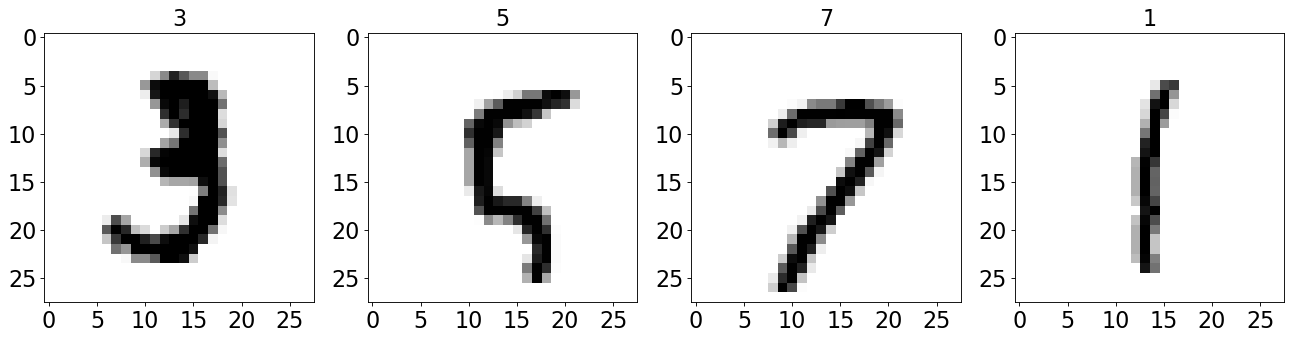

In [4]:
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

plt.subplot((141))
img=train_images[10,:,:]
plt.imshow(img, cmap=plt.cm.binary)
plt.title(train_labels[10,],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot((142))
img=train_images[100,:,:]
plt.imshow(img, cmap=plt.cm.binary)
plt.title(train_labels[100,],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot((143))
img=train_images[230,:,:]
plt.imshow(img, cmap=plt.cm.binary)
plt.title(train_labels[230,],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.subplot((144))
img=train_images[4010,:,:]
plt.imshow(img, cmap=plt.cm.binary)
plt.title(train_labels[4010,],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

Next, we build a simple one layer newral network that consists of a sequence of three Dense layers. The first is densely-connected neural layers, the second is dropout layer, and the third is a 10-way "softmax" layer, which means it will return an array of ten probability scores were each score will be the probability that the current digit image belongs to one of the ten digit classes.

In [3]:
from keras import models
from keras import layers

In [4]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', #An optimizer
                loss='categorical_crossentropy', #A loss function
                metrics=['accuracy']) #Metric to monitor during training and testing

Next we pre-process the data by reshaping it into the shape that the network expects, and scale it so that all values are in the [0, 1] interval. 

In [5]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Categorically encode the labels

In [6]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Seperate the train data to 'train' and 'dev' dets

In [7]:
val_train_images = train_images[:10000,:]
partial_train_images = train_images[10000:,:]

val_train_labels = train_labels[:10000,:]
partial_train_labels = train_labels[10000:,:]

print(val_train_images.shape)
print(partial_train_images.shape)
print(val_train_labels.shape)
print(partial_train_labels.shape)

(10000, 784)
(50000, 784)
(10000, 10)
(50000, 10)


Let us train the model: we "fit" the model to its training data

In [8]:
history = model.fit(partial_train_images, 
                    partial_train_labels, 
                    epochs=20, # 20 iterations over the traning data
                    batch_size=128,  # each time with a batch of 128 training examples
                    validation_data=(val_train_images, val_train_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 6s 124us/step - loss: 0.3614 - acc: 0.8928 - val_loss: 0.1729 - val_acc: 0.9504
Epoch 2/20
50000/50000 [==============================] - 6s 116us/step - loss: 0.1698 - acc: 0.9495 - val_loss: 0.1219 - val_acc: 0.9640
Epoch 3/20
50000/50000 [==============================] - 7s 133us/step - loss: 0.1274 - acc: 0.9614 - val_loss: 0.1037 - val_acc: 0.9705
Epoch 4/20
50000/50000 [==============================] - 7s 149us/step - loss: 0.1044 - acc: 0.9674 - val_loss: 0.0904 - val_acc: 0.9739
Epoch 5/20
50000/50000 [==============================] - 7s 137us/step - loss: 0.0873 - acc: 0.9738 - val_loss: 0.0830 - val_acc: 0.9750
Epoch 6/20
50000/50000 [==============================] - 6s 126us/step - loss: 0.0777 - acc: 0.9753 - val_loss: 0.0739 - val_acc: 0.9782
Epoch 7/20
50000/50000 [==============================] - 7s 131us/step - loss: 0.0673 - acc: 0.9786 - val_loss: 0.0763 - 

The results are stored in 'history'. Two quantities are being displayed during training: the "loss" of the model over the training data, and the accuracy of the model over the training data.

Right after one iteration we reached an accuracy of 89% and 99% by the 19th. Now let's check that our model performs well on the test set too:

In [9]:
history_dict = history.history
history_dict.keys()
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 92us/step


In [10]:
print('test_acc:', test_acc)

test_acc: 0.9822


Lastely, we print the loss and accuracy of the train and dev sets as a function of the epoch. 

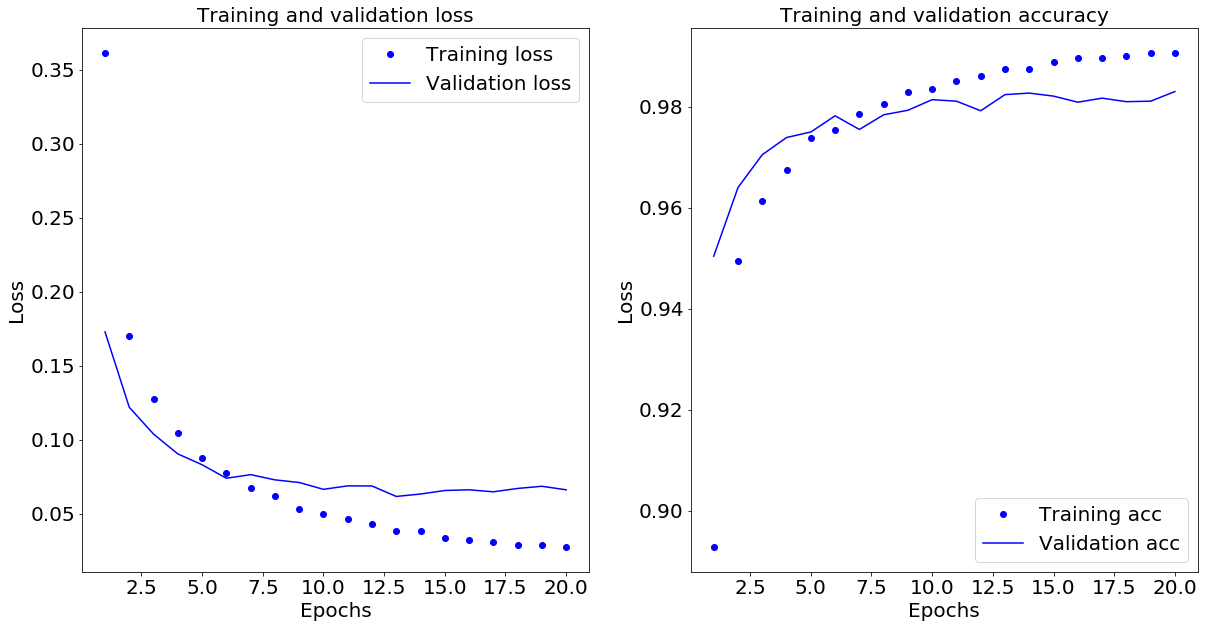

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.subplot(121)
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


plt.subplot(122)
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy',fontsize=20)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

For the training data the loss goes down with the epoch number which is not surptising. It somewhat saturate for the dev set after and about the 10 epoch, but does not go up which means that we are not overfitting.
The accuricy goes up with the epoch, sharply for the train data but also for the dev data which means that the model keeps on getting better and better on the supervised task as it goes on and on over the training and dev examples.